In [1]:
# uporabljene knjižnice
import json
import pandas as pd
from dateutil.parser import parse

In [2]:
# prvi semester
matematika = json.load(open('DATA/matematika.json', encoding="utf8"))
matematikaDf = pd.DataFrame(matematika["messages"]) 

diskretne = json.load(open('DATA/diskretne-strukture.json', encoding="utf8"))
diskretneDf = pd.DataFrame(diskretne["messages"]) 

programiranje1 = json.load(open('DATA/programiranje-1.json', encoding="utf8"))
programiranje1Df = pd.DataFrame(programiranje1["messages"]) 

uvod = json.load(open('DATA/uvod-v-racunalnistvo.json', encoding="utf8"))
uvodDf = pd.DataFrame(uvod["messages"]) 

arhitektura = json.load(open('DATA/racunalniska-arhitektura.json', encoding="utf8"))
arhitekturaDf = pd.DataFrame(arhitektura["messages"]) 

In [3]:
# drugi semester 
komunikacije = json.load(open('DATA/racunalniske-komunikacije.json', encoding="utf8"))
komunikacijeDf = pd.DataFrame(komunikacije["messages"]) 

operacijski = json.load(open('DATA/operacijski-sistemi.json', encoding="utf8"))
operacijskiDf = pd.DataFrame(operacijski["messages"]) 

programiranje2 = json.load(open('DATA/programiranje-2.json', encoding="utf8"))
programiranje2Df = pd.DataFrame(programiranje2["messages"]) 

podatkovneBaze = json.load(open('DATA/podatkovne-baze.json', encoding="utf8"))
podatkovneBazeDf = pd.DataFrame(podatkovneBaze["messages"]) 

statistika = json.load(open('DATA/statistika.json', encoding="utf8"))
statistikaDf = pd.DataFrame(statistika["messages"]) 

In [4]:
allDf = [matematikaDf, diskretneDf, programiranje1Df, uvodDf, arhitekturaDf,
         komunikacijeDf, operacijskiDf, programiranje2Df, podatkovneBazeDf, statistikaDf]

In [5]:
def studijsko_leto(row):
    if row.timestamp < pd.Timestamp(2018, 10, 1):
        return "17/18"
    if row.timestamp < pd.Timestamp(2019, 10, 1):
        return "18/19"
    if row.timestamp < pd.Timestamp(2020, 10, 1):
        return "19/20"
    else:
        return "20/21"

In [6]:
# Spremenimo format datuma
# Nastavimo stolpec studijskoLeto
for df in allDf:
    df["timestamp"] = df["timestamp"].apply(lambda x: parse(x).date())
    df["Študijsko leto"] = df.apply(lambda row: studijsko_leto(row), axis=1)

In [7]:
mat = matematikaDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Matematika')
ds = diskretneDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Diskretne strukture')
p1 = programiranje1Df.groupby("Študijsko leto")["Študijsko leto"].count().rename('Programiranje 1')
ur = uvodDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Uvod v računalništvo')
ra = arhitekturaDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Računalniška arhitektura')
rk = komunikacijeDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Računalniške komunikacije')
os = operacijskiDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Operacijsko sistemi')
p2 = programiranje2Df.groupby("Študijsko leto")["Študijsko leto"].count().rename('Programiranje 2')
pb = podatkovneBazeDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Podatkovne baze')
vis = statistikaDf.groupby("Študijsko leto")["Študijsko leto"].count().rename('Verjetnost in statistika')

In [8]:
graf = pd.concat([mat, ds, p1, ur, ra, rk, os, p2, pb, vis], axis=1).reset_index()

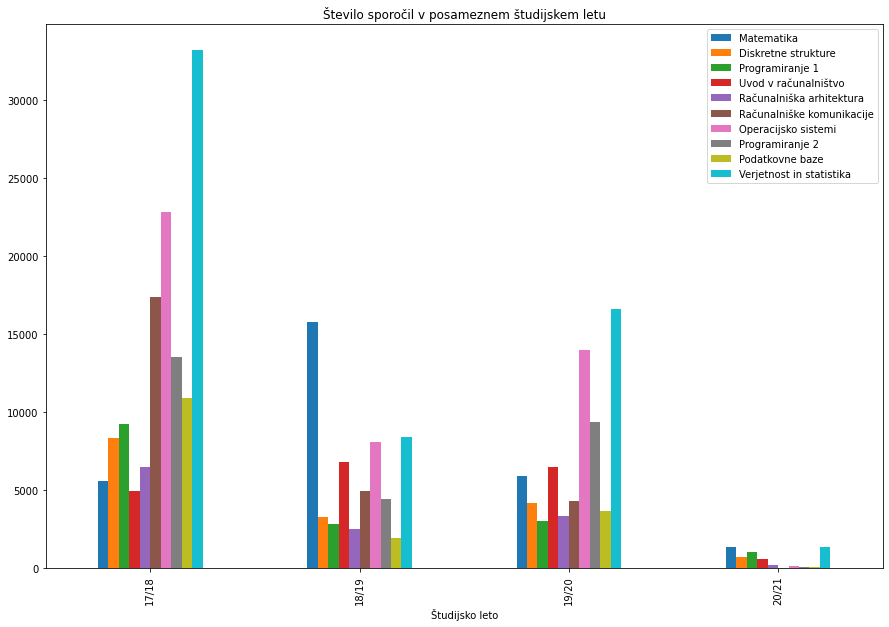

In [9]:
ax = graf.plot(x="Študijsko leto", kind="bar", figsize=(15, 10),
               title="Število sporočil v posameznem študijskem letu")

In [10]:
graf["skupaj"] = graf.iloc[:, 1:10].sum(axis=1)
graf

,Študijsko leto,Matematika,Diskretne strukture,Programiranje 1,Uvod v računalništvo,Računalniška arhitektura,Računalniške komunikacije,Operacijsko sistemi,Programiranje 2,Podatkovne baze,Verjetnost in statistika,skupaj
0,17/18,5562,8356,9207,4939,6508,17380,22853,13497,10913,33184,99215
1,18/19,15773,3257,2800,6817,2508,4909,8054,4410,1899,8408,50427
2,19/20,5887,4170,3010,6491,3325,4298,13965,9381,3666,16634,54193
3,20/21,1347,715,1029,596,184,11,136,58,38,1323,4114


Število sporočil je v povprečju močno prevladovalo v prvem letu uporabe serverja (študijsko leto 2017/18), že naslednje leto pa je padlo skoraj na polovico. V študijskem letu 2019/20 se je število sporočil povečalo pri predmetih iz drugega semestra, kar lahko pripisujemo pojavu koronavirusa. Študentje so moralli poiskati drug vir komunikacije in očitno je bil Discord eden izmed njih.